In [41]:
import pandas as pd
import numpy as np


d_sim = pd.read_excel("./similarities_with_w2vacc.xlsx")


d_sim = d_sim[(d_sim['Experiment'] == '1a') & (d_sim['PartOfExp'] == 'test')]
d_sim = d_sim.rename(columns={'TrainingTalkerID': 'ExposureTalkerID'})

d_sim['ExposureTalkerID'] = d_sim.apply(
    lambda row: row['ExposureTalkerID'] if row['Condition2'] == 'Single talker' 
    else f"Exposure for {row['Condition2']} - TestTalkerID {row['TestTalkerID']}" if row['Condition2'] in ['Multi-talker', 'Talker-specific'] 
    else f"Exposure for {row['Condition2']}",
    axis=1
)

d_sim['KeywordID'] = pd.factorize(d_sim['Keyword'])[0] + 1
d_sim['ProportionDiphoneOverlap'] = d_sim['diphone_overlapped'] / d_sim['NumDiphone_word']

id_columns = ['WorkerID', 'ExposureTalkerID', 'TestTalkerID', 'SentenceID', 'KeywordID']
d_sim[id_columns] = d_sim[id_columns].astype('category')


d_sim['Condition'] = pd.Categorical(d_sim['Condition2'], categories=['Control', 'Single talker', 'Multi-talker', 'Talker-specific'], ordered=True)




,Unnamed: 0,Sentence,WorkerID,PartOfExp,Trial,ListPosition,Filename,Transcription,Condition,TrainingTestSet,...,sim_mean_max,sim_mean_std,sim_mean_mean,diphone_overlapped,NumDiphone_word,wav2vec_acc,x,y,KeywordID,ProportionDiphoneOverlap
0,0,The shoes were very dirty.,f8b17be6a35f51d7f154ff160f33e71c,test,1,3,talker_CMN_M_032/ALL_032_M_CMN_ENG_HT1_S004,the shoes were very dirty,Control,"set2,set1",...,0.841145,0.010943,0.814770,2,2,1.000000,"['ʃ', 'u', 'z']","['ʃ', 'u', 'z']",1,1.0
1,1,The shoes were very dirty.,f8b17be6a35f51d7f154ff160f33e71c,test,1,3,talker_CMN_M_032/ALL_032_M_CMN_ENG_HT1_S004,the shoes were very dirty,Control,"set2,set1",...,0.000000,0.000000,0.000000,1,1,0.500000,"['w', 'ɜ']","['w', 'ɹ']",2,1.0
2,2,The shoes were very dirty.,f8b17be6a35f51d7f154ff160f33e71c,test,1,3,talker_CMN_M_032/ALL_032_M_CMN_ENG_HT1_S004,the shoes were very dirty,Control,"set2,set1",...,0.288743,0.006970,0.269221,3,3,0.750000,"['v', 'e', 'ɹ', 'i']","['v', 'æ', 'ɹ', 'i']",3,1.0
3,3,The shoes were very dirty.,f8b17be6a35f51d7f154ff160f33e71c,test,1,3,talker_CMN_M_032/ALL_032_M_CMN_ENG_HT1_S004,the shoes were very dirty,Control,"set2,set1",...,0.280643,0.003955,0.268566,3,3,0.750000,"['d', 'ɜ', 't', 'i']","['d', 'æ', 't', 'i']",4,1.0
4,4,The shoes were very dirty.,9c2c7fd165b3aa898e658c3cc81da774,test,13,3,talker_CMN_M_032/ALL_032_M_CMN_ENG_HT1_S004,the shoes were very dirty,Multi-talker,"set2,set1",...,0.841145,0.010896,0.814877,2,2,1.000000,"['ʃ', 'u', 'z']","['ʃ', 'u', 'z']",1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16472,16472,The mother heard the baby.,2c8cb26b4de025cbd7351f4861655d1f,test,9,2,talker_CMN_M_032/ALL_032_M_CMN_ENG_HT1_S020,the mother heard the baby.,Talker-specific,"set1,set2",...,0.000000,0.000000,0.000000,2,2,0.333333,"['h', 'ɜ', 'd']","['h', 'ɹ', 't']",95,1.0
16473,16473,The mother heard the baby.,2c8cb26b4de025cbd7351f4861655d1f,test,9,2,talker_CMN_M_032/ALL_032_M_CMN_ENG_HT1_S020,the mother heard the baby.,Talker-specific,"set1,set2",...,0.857715,0.016166,0.808617,3,3,1.000000,"['b', 'eɪ', 'b', 'i']","['b', 'eɪ', 'b', 'i']",96,1.0
16474,16474,The mother heard the baby.,b985a11f9fc4599fcbb58cc157631cb0,test,7,2,talker_CMN_M_035/ALL_035_M_CMN_ENG_HT1_S020,the mother heard the baby.,Multi-talker,"set1,set2",...,0.568468,0.011670,0.542464,3,3,0.750000,"['m', 'ʌ', 'ð', 'ɜ']","['m', 'ʌ', 'ð', 'ɹ']",79,1.0
16475,16475,The mother heard the baby.,b985a11f9fc4599fcbb58cc157631cb0,test,7,2,talker_CMN_M_035/ALL_035_M_CMN_ENG_HT1_S020,the mother heard the baby.,Multi-talker,"set1,set2",...,0.000000,0.000000,0.000000,3,3,0.250000,"['h', 'ɜ', 'd']","['h', 'ɹ', 't', 'ɪ']",95,1.0


In [113]:
d_sim.columns

Index(['Unnamed: 0', 'Sentence', 'WorkerID', 'PartOfExp', 'Trial',
       'ListPosition', 'Filename', 'Transcription', 'Condition',
       'TrainingTestSet', 'ListNum', 'PresentationBlock',
       'TestTalkerNameShort', 'TestTalkerName', 'TestTalkerID',
       'Answer.accent_familiarity_place', 'Answer.audio_stall',
       'Answer.comments', 'Answer.condition', 'Answer.errors',
       'Answer.guess_accent', 'Answer.language_background',
       'Answer.language_background_free', 'Answer.list_num', 'Answer.rsrb.age',
       'Answer.rsrb.ethnicity', 'Answer.rsrb.protocol', 'Answer.rsrb.race',
       'Answer.rsrb.raceother', 'Answer.rsrb.sex', 'Answer.speaker',
       'assignmentsubmittime', 'ItemRepetition', 'OrderOfSubmission',
       'SentenceID', 'Keywords', 'NumKeywords', 'Keywords_perSet',
       'PropKeywordsCorrect', 'NumKeywordsCorrect', 'Condition.long',
       'Condition2', 'AccentFamFreq', 'AudioQual', 'AudioType2_WoreHeadphones',
       'AudioType', 'CurrentTalkerIDShort', 'Cu

In [7]:

d_sim_unique = d_sim.drop_duplicates(subset=['Condition', 'ExposureTalkerID', 'TestTalkerID', 'SentenceID', 'KeywordID'])
d_sim_unique



,Unnamed: 0,Sentence,WorkerID,PartOfExp,Trial,ListPosition,Filename,Transcription,Condition,TrainingTestSet,...,sim_mean_std,sim_mean_mean,diphone_overlapped,NumDiphone_word,wav2vec_acc,x,y,KeywordID,ProportionDiphoneOverlap,first_sim_mean_max
0,0,The shoes were very dirty.,f8b17be6a35f51d7f154ff160f33e71c,test,1,3,talker_CMN_M_032/ALL_032_M_CMN_ENG_HT1_S004,the shoes were very dirty,Control,"set2,set1",...,0.010943,0.814770,2,2,1.000000,"['ʃ', 'u', 'z']","['ʃ', 'u', 'z']",1,1.0,0.841145
1,1,The shoes were very dirty.,f8b17be6a35f51d7f154ff160f33e71c,test,1,3,talker_CMN_M_032/ALL_032_M_CMN_ENG_HT1_S004,the shoes were very dirty,Control,"set2,set1",...,0.000000,0.000000,1,1,0.500000,"['w', 'ɜ']","['w', 'ɹ']",2,1.0,0.000000
2,2,The shoes were very dirty.,f8b17be6a35f51d7f154ff160f33e71c,test,1,3,talker_CMN_M_032/ALL_032_M_CMN_ENG_HT1_S004,the shoes were very dirty,Control,"set2,set1",...,0.006970,0.269221,3,3,0.750000,"['v', 'e', 'ɹ', 'i']","['v', 'æ', 'ɹ', 'i']",3,1.0,0.288743
3,3,The shoes were very dirty.,f8b17be6a35f51d7f154ff160f33e71c,test,1,3,talker_CMN_M_032/ALL_032_M_CMN_ENG_HT1_S004,the shoes were very dirty,Control,"set2,set1",...,0.003955,0.268566,3,3,0.750000,"['d', 'ɜ', 't', 'i']","['d', 'æ', 't', 'i']",4,1.0,0.280643
4,4,The shoes were very dirty.,9c2c7fd165b3aa898e658c3cc81da774,test,13,3,talker_CMN_M_032/ALL_032_M_CMN_ENG_HT1_S004,the shoes were very dirty,Multi-talker,"set2,set1",...,0.010896,0.814877,2,2,1.000000,"['ʃ', 'u', 'z']","['ʃ', 'u', 'z']",1,1.0,0.841145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16334,16334,The mother heard the baby.,ea7a56b4c63606f2f2ab27bc1ef32fe3,test,3,2,talker_CMN_M_043/ALL_043_M_CMN_ENG_HT1_S020,mother a bigger.,Single talker,"set1,set2",...,0.000000,0.000000,2,2,0.333333,"['h', 'ɜ', 'd']","['h', 'æ', 'ɹ']",95,1.0,0.000000
16335,16335,The mother heard the baby.,ea7a56b4c63606f2f2ab27bc1ef32fe3,test,3,2,talker_CMN_M_043/ALL_043_M_CMN_ENG_HT1_S020,mother a bigger.,Single talker,"set1,set2",...,0.015911,0.809563,3,3,1.000000,"['b', 'eɪ', 'b', 'i']","['b', 'eɪ', 'b', 'i']",96,1.0,0.858215
16336,16336,The mother heard the baby.,66000974dab792389c71ffd9005a1942,test,14,2,talker_CMN_M_043/ALL_043_M_CMN_ENG_HT1_S020,the mother heard the baby,Single talker,"set1,set2",...,0.011526,0.541942,3,3,0.750000,"['m', 'ʌ', 'ð', 'ɜ']","['m', 'ʌ', 'ð', 'æ']",79,1.0,0.571469
16337,16337,The mother heard the baby.,66000974dab792389c71ffd9005a1942,test,14,2,talker_CMN_M_043/ALL_043_M_CMN_ENG_HT1_S020,the mother heard the baby,Single talker,"set1,set2",...,0.000000,0.000000,2,2,0.333333,"['h', 'ɜ', 'd']","['h', 'æ', 'ɹ']",95,1.0,0.000000


<Figure size 1200x800 with 0 Axes>

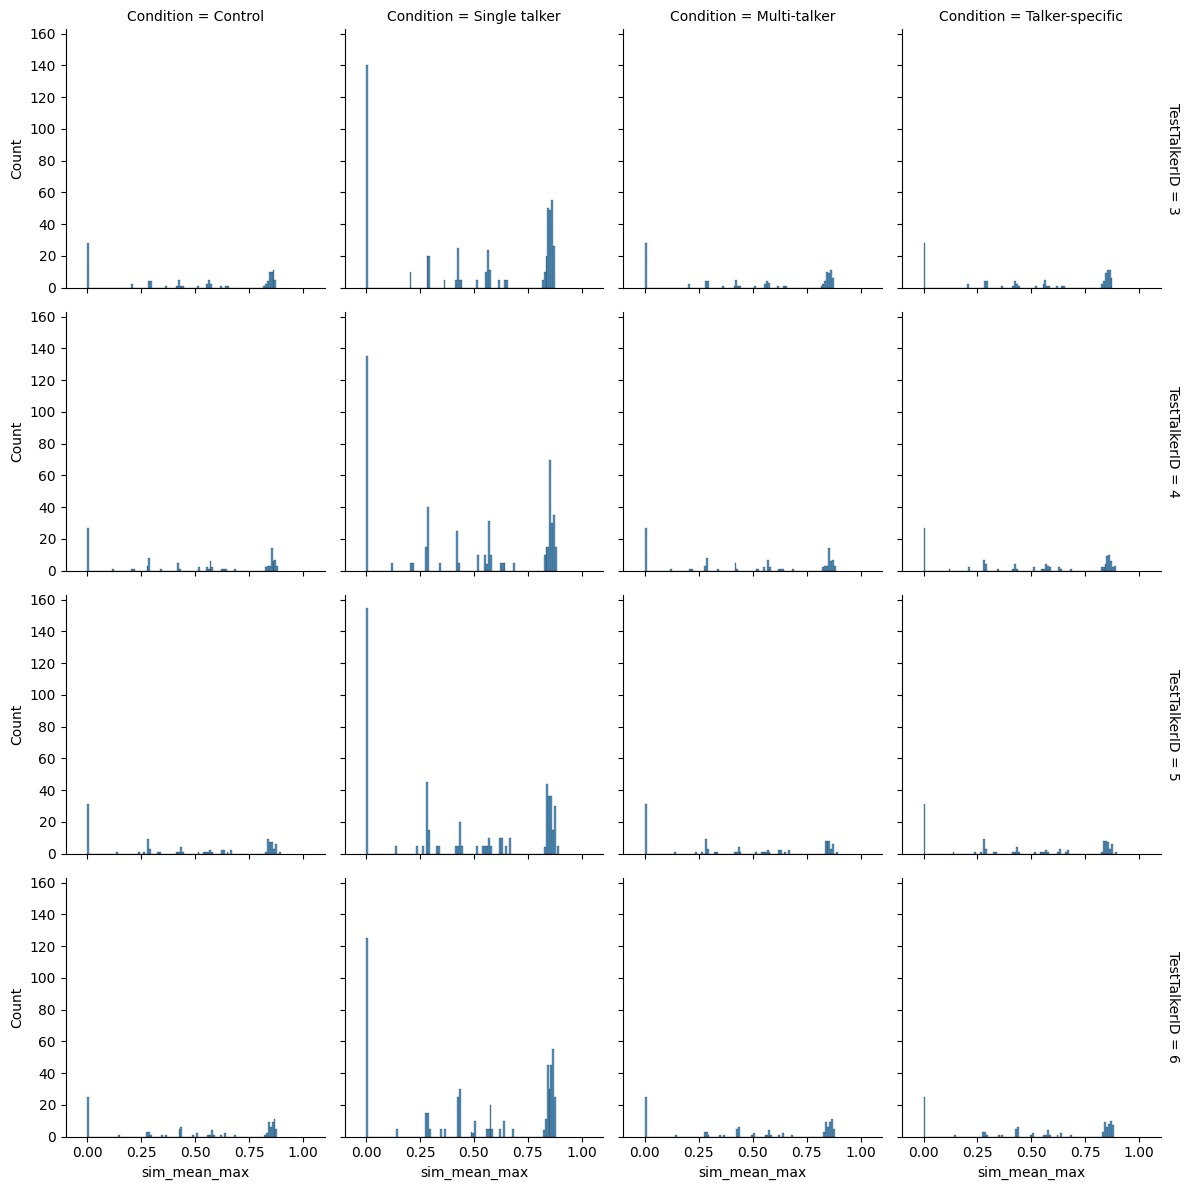

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# group by conditions, compute the mean of sim_mean_max
grouped_sim = d_sim.groupby(['Condition', 'ExposureTalkerID', 'TestTalkerID', 'SentenceID', 'KeywordID']).agg(
    sim_mean_max=('sim_mean_max', 'mean')
).reset_index()


plt.figure(figsize=(12, 8))
g = sns.FacetGrid(grouped_sim, row='TestTalkerID', col='Condition', margin_titles=True, sharex=True)
g.map(sns.histplot, 'sim_mean_max', bins=100)
g.set(xlim=(-0.1, 1.1))
plt.tight_layout()
plt.show()


In [95]:
#grouped_sim =d_sim.groupby(['Condition', 'ExposureTalkerID', 'TestTalkerID', 'SentenceID', 'KeywordID']).first().reset_index()#.apply(lambda x: x.iloc[0])
grouped_sim=d_sim.drop_duplicates(subset=['Condition', 'TestTalkerID', 'SentenceID', 'KeywordID'], keep='first')#, 'ExposureTalkerID'
grouped_sim["Condition"].value_counts()


Control            412
Single talker      412
Multi-talker       412
Talker-specific    412
Name: Condition, dtype: int64

In [108]:
index_lists = grouped_sim.groupby('TestTalkerID').apply(lambda x: list(x.index))
index_lists

TestTalkerID
3    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 28, 29,...
4    [12, 13, 14, 15, 36, 37, 38, 39, 48, 49, 50, 5...
5    [16, 17, 18, 19, 32, 33, 34, 35, 44, 45, 46, 4...
6    [24, 25, 26, 27, 56, 57, 58, 59, 92, 93, 94, 9...
dtype: object

In [72]:
npz_file = np.load('confusion_matrix.npz')
confusion_matrix=[]
for key in npz_file:
    confusion_matrix.append(npz_file[key])

In [109]:
english_phonemes = ['<pad>', '<s>', '</s>', '<unk>','p', 'b', 't', 'd', 'k', 'ɡ','m', 'n', 'ŋ', 'f', 'v', 'θ', 'ð', 's', 'z', 'ʃ', 'h', 'tʃ', 'dʒ', 'l', 'ɹ', 'w', 'j', "i", "ɪ", "ʊ", "u", "e", "ɜ", "æ", "ʌ", "ɑ", "ɒ", "eɪ", "ɔɪ", "oʊ", "aɪ", "aʊ"]
N = confusion_matrix[0].shape[0]
TestTalkerID_3_confusion_matrix = np.zeros((N, N))
TestTalkerID_4_confusion_matrix = np.zeros((N, N))
TestTalkerID_5_confusion_matrix = np.zeros((N, N))
TestTalkerID_6_confusion_matrix = np.zeros((N, N))
for i in index_lists[3]:  
    TestTalkerID_3_confusion_matrix += confusion_matrix[i]
for i in index_lists[4]: 
    TestTalkerID_4_confusion_matrix += confusion_matrix[i]
for i in index_lists[5]: 
    TestTalkerID_5_confusion_matrix += confusion_matrix[i]
for i in index_lists[6]:
    TestTalkerID_6_confusion_matrix += confusion_matrix[i]

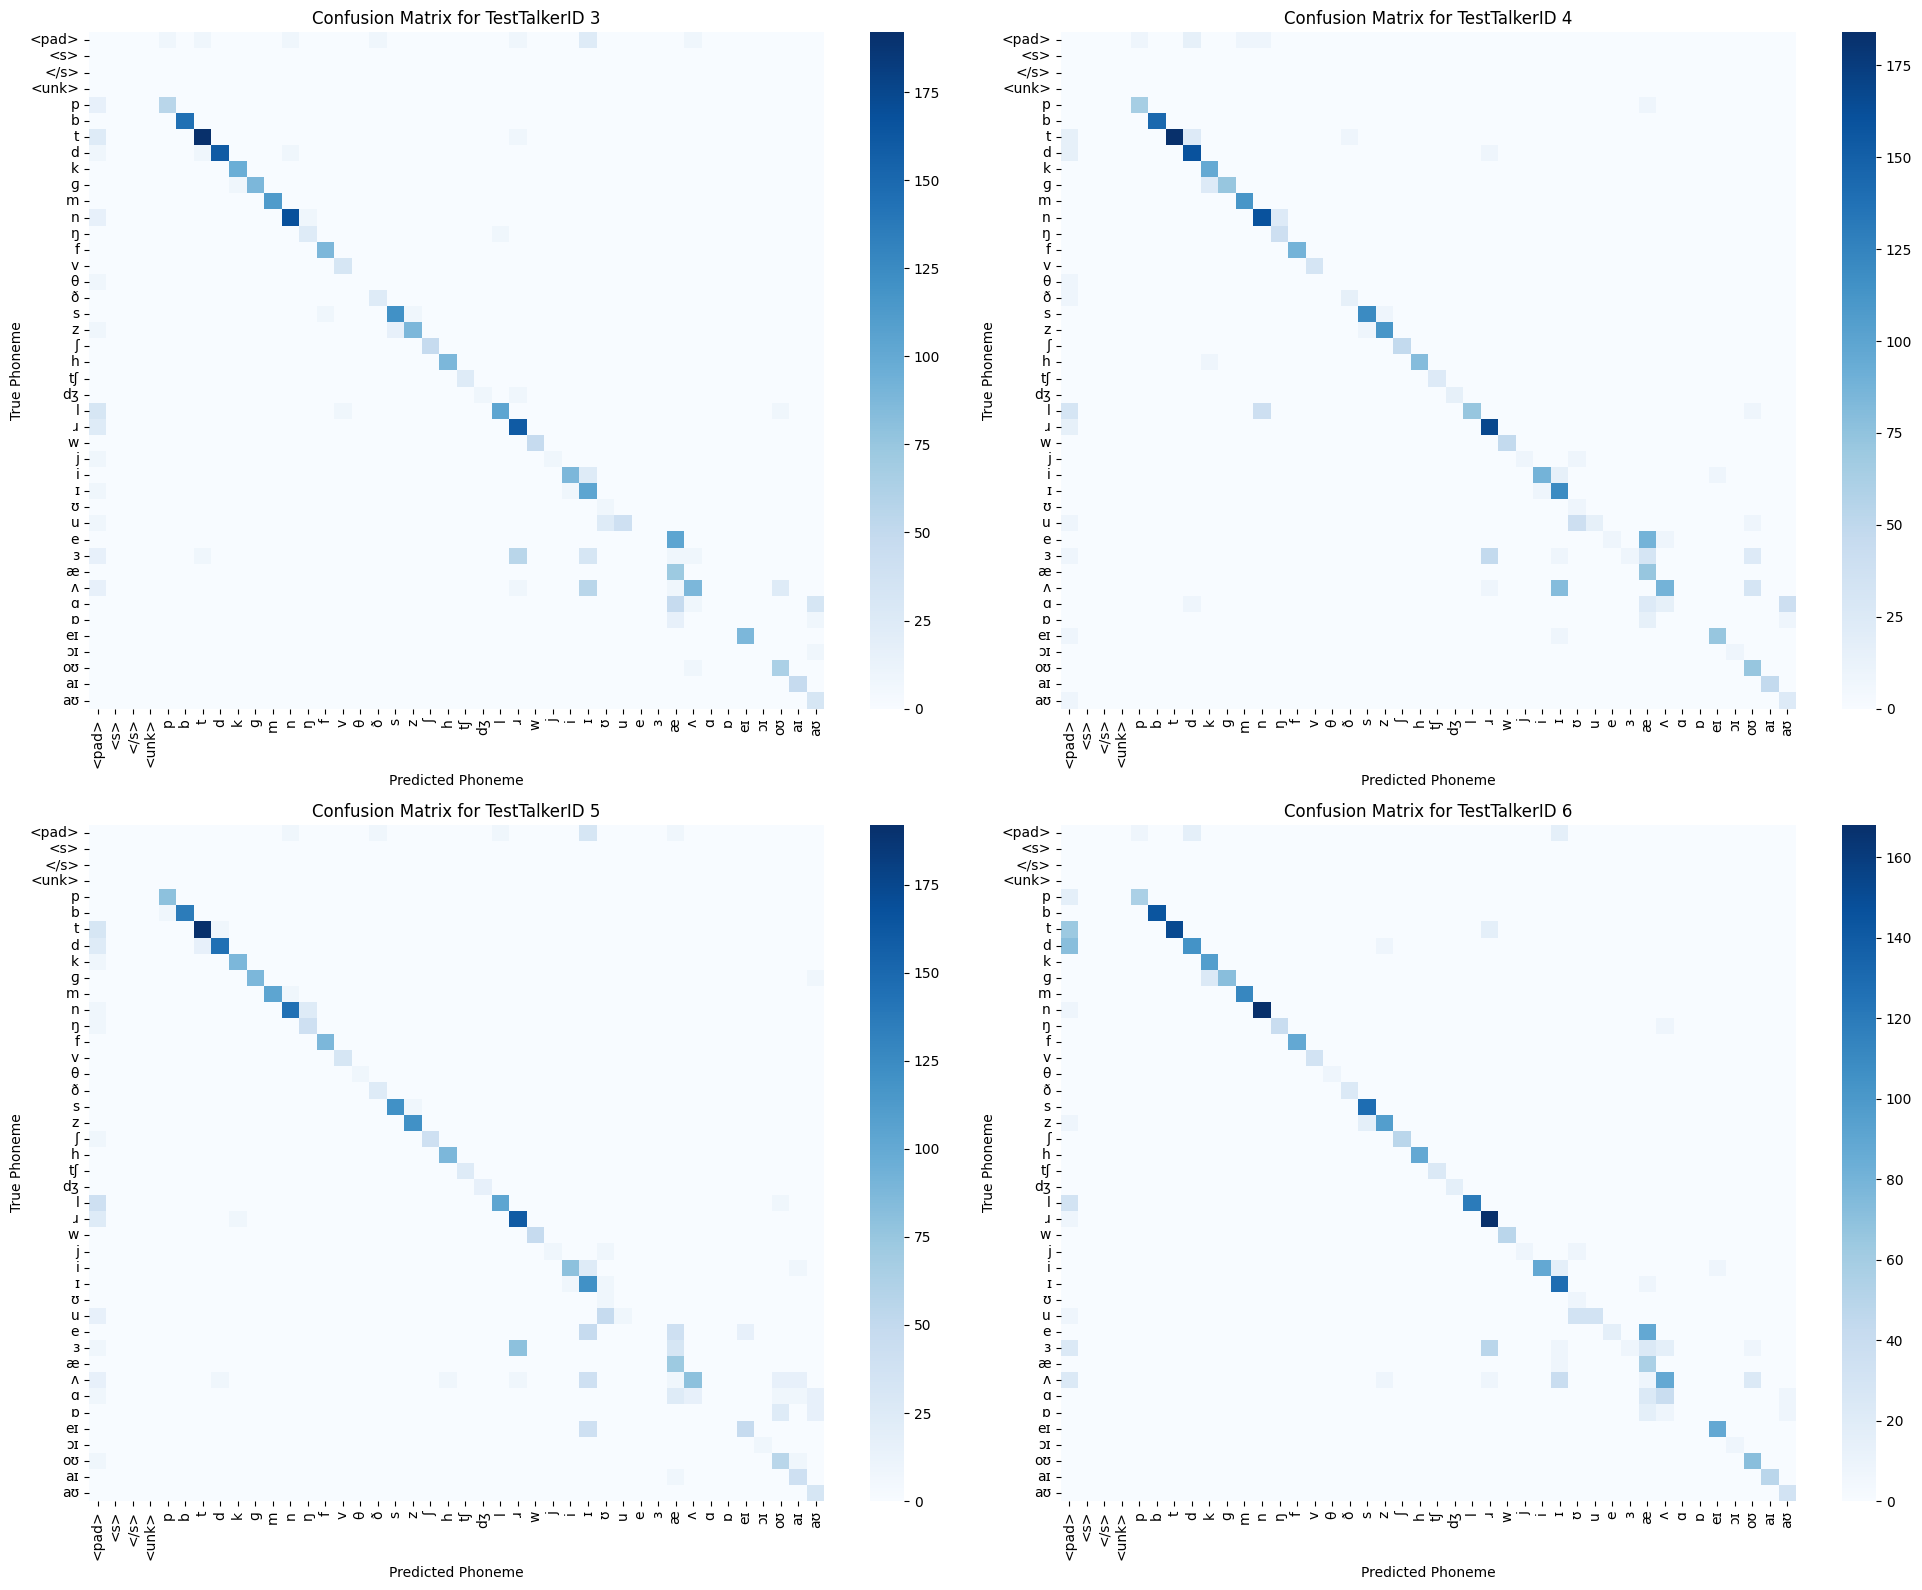

In [110]:
plt.figure(figsize=(20, 15))

plt.subplot(2, 2, 1)
sns.heatmap(TestTalkerID_3_confusion_matrix, annot=False, cmap="Blues", 
            xticklabels=english_phonemes, yticklabels=english_phonemes)
plt.xlabel('Predicted Phoneme')
plt.ylabel('True Phoneme')
plt.title('Confusion Matrix for TestTalkerID 3')

plt.subplot(2, 2, 2)
sns.heatmap(TestTalkerID_4_confusion_matrix, annot=False, cmap="Blues", 
            xticklabels=english_phonemes, yticklabels=english_phonemes)
plt.xlabel('Predicted Phoneme')
plt.ylabel('True Phoneme')
plt.title('Confusion Matrix for TestTalkerID 4')

plt.subplot(2, 2, 3)
sns.heatmap(TestTalkerID_5_confusion_matrix, annot=False, cmap="Blues", 
            xticklabels=english_phonemes, yticklabels=english_phonemes)
plt.xlabel('Predicted Phoneme')
plt.ylabel('True Phoneme')
plt.title('Confusion Matrix for TestTalkerID 5')

plt.subplot(2, 2, 4)
sns.heatmap(TestTalkerID_6_confusion_matrix, annot=False, cmap="Blues", 
            xticklabels=english_phonemes, yticklabels=english_phonemes)
plt.xlabel('Predicted Phoneme')
plt.ylabel('True Phoneme')
plt.title('Confusion Matrix for TestTalkerID 6')

plt.tight_layout()

plt.show()

In [111]:
grouped_sim=d_sim.drop_duplicates(subset=['Condition', 'TestTalkerID', 'SentenceID', 'KeywordID'], keep='first')#, 'ExposureTalkerID'
index_lists = grouped_sim.groupby('Condition').apply(lambda x: list(x.index))
Control_confusion_matrix=np.zeros((N,N))
Single_confusion_matrix=np.zeros((N,N))
Multi_confusion_matrix=np.zeros((N,N))
Specific_confusion_matrix=np.zeros((N,N))
for i in index_lists[0]:
    Control_confusion_matrix+=confusion_matrix[i]
for i in index_lists[1]:
    Single_confusion_matrix+=confusion_matrix[i]
for i in index_lists[2]:
    Multi_confusion_matrix+=confusion_matrix[i]
for i in index_lists[3]:
    Specific_confusion_matrix+=confusion_matrix[i]

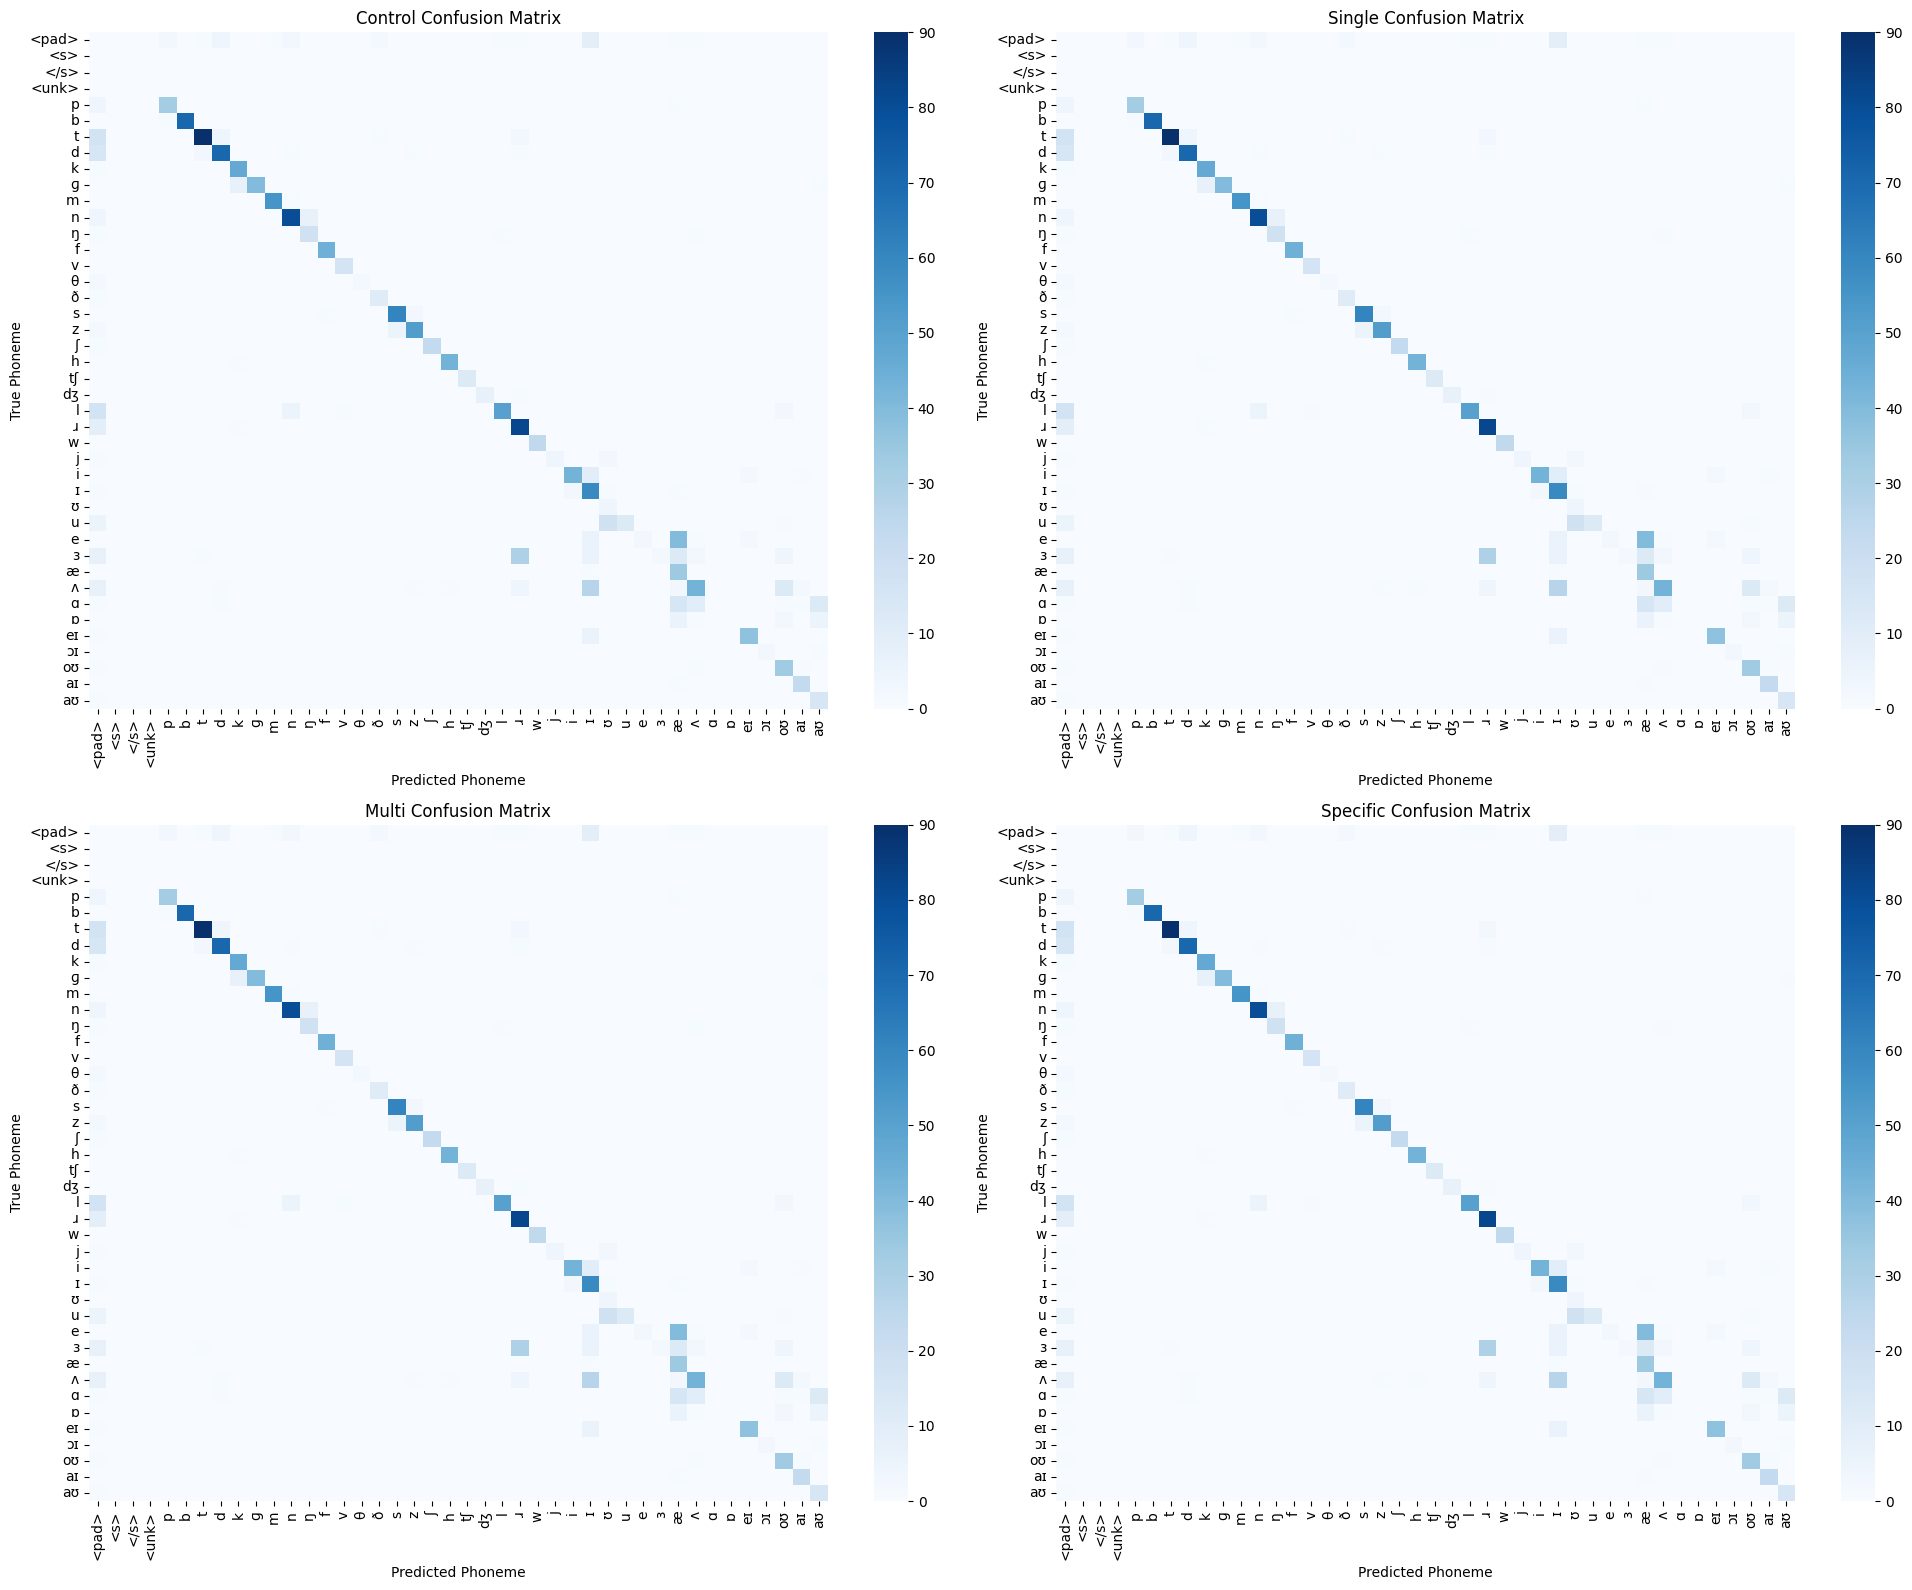

In [112]:
plt.figure(figsize=(20, 16))

plt.subplot(2, 2, 1)
sns.heatmap(Control_confusion_matrix, annot=False, cmap="Blues", 
            xticklabels=english_phonemes, yticklabels=english_phonemes)
plt.xlabel('Predicted Phoneme')
plt.ylabel('True Phoneme')
plt.title('Control Confusion Matrix')

plt.subplot(2, 2, 2)
sns.heatmap(Single_confusion_matrix, annot=False, cmap="Blues", 
            xticklabels=english_phonemes, yticklabels=english_phonemes)
plt.xlabel('Predicted Phoneme')
plt.ylabel('True Phoneme')
plt.title('Single Confusion Matrix')

plt.subplot(2, 2, 3)
sns.heatmap(Multi_confusion_matrix, annot=False, cmap="Blues", 
            xticklabels=english_phonemes, yticklabels=english_phonemes)
plt.xlabel('Predicted Phoneme')
plt.ylabel('True Phoneme')
plt.title('Multi Confusion Matrix')

plt.subplot(2, 2, 4)
sns.heatmap(Specific_confusion_matrix, annot=False, cmap="Blues", 
            xticklabels=english_phonemes, yticklabels=english_phonemes)
plt.xlabel('Predicted Phoneme')
plt.ylabel('True Phoneme')
plt.title('Specific Confusion Matrix')
plt.tight_layout()
plt.show()